In [155]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [156]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_Air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = [theta1_atg - thetam_atg, theta1_gta + thetam_gta]

In [157]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2_list[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2_list[1]), abs(np.sin(0.5 * np.pi/180)))

In [158]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.4542 plusminus 0.0134


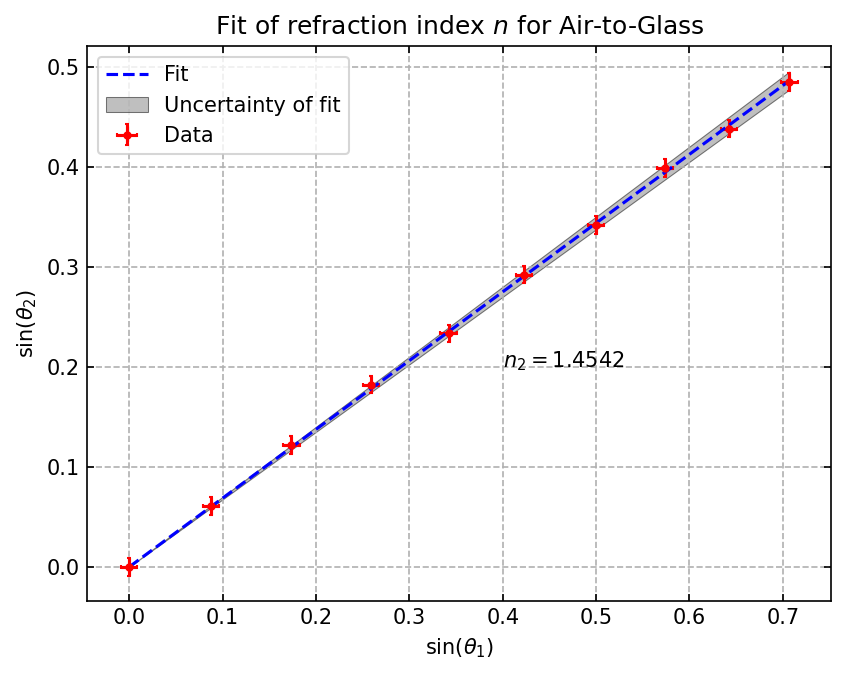

In [159]:
p_opt_atg, p_cov_atg = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2_list[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2_list[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0] - 2 * np.sqrt(p_cov_atg[0][0])), n_fit(np.sin(theta1[0]), p_opt_atg[0] + 2 * np.sqrt(p_cov_atg[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.4, 0.2, f'$n_2 = {round(p_opt_atg[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_atg[0], 4), round(np.sqrt(p_cov_atg[0][0]), 4)))
n_2_atg = p_opt_atg
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 0.9785 plusminus 0.0061


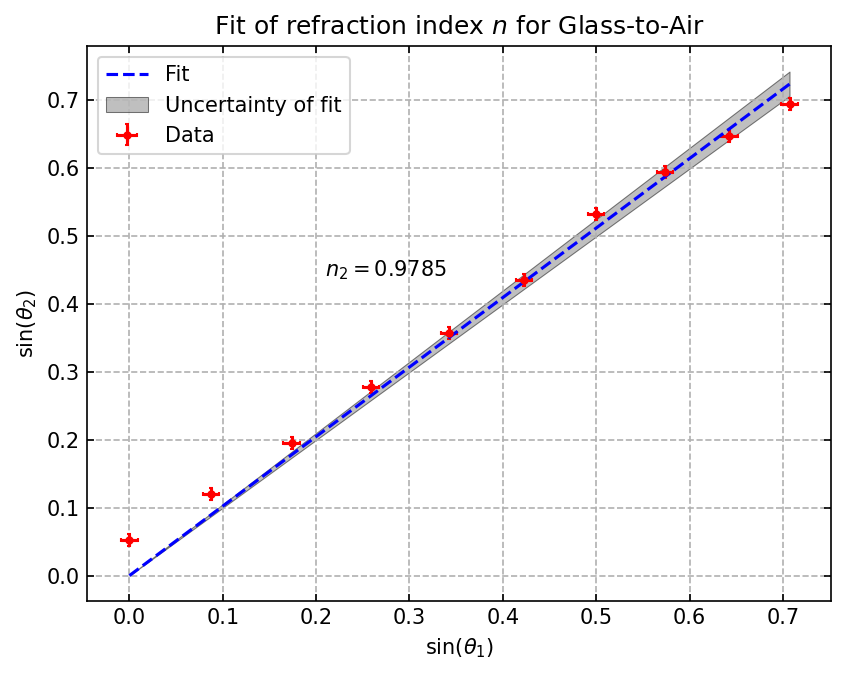

In [160]:
p_opt_gta, p_cov_gta = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2_list[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2_list[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0] - 4*np.sqrt(p_cov_gta[0][0])), n_fit(np.sin(theta1[1]), p_opt_gta[0] + 4* np.sqrt(p_cov_gta[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt_gta[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_gta[0], 4), round(np.sqrt(p_cov_gta[0][0]), 4)))
n_2_gta = p_opt_gta
plt.show()




COMPARING R+T01

In [161]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_AtG_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_AtG_Labday_3.txt')

#Intensity of laser
E_0_S = 5 #1.8 on the day
E_0_P = 1.25

#Intensity of transmitted and reflected light
E_1_S = S_pol_L3[:, 2]
E_2_S = S_pol_L3[:, 5]

E_1_P = P_pol_L3[:, 2]
E_2_P = P_pol_L3[:, 5]

In [162]:
#Getting the small r value
r_s = E_1_S/E_0_S

r_p =E_1_P/E_0_P
r_p, r_s

(array([0.344, 0.36 , 0.384, 0.368, 0.352, 0.32 , 0.32 , 0.312, 0.288,
        0.272, 0.24 , 0.232, 0.184, 0.152, 0.112, 0.08 , 0.036, 0.   ]),
 array([0.76 , 0.82 , 0.84 , 0.8  , 0.76 , 0.72 , 0.66 , 0.66 , 0.62 ,
        0.58 , 0.48 , 0.48 , 0.36 , 0.28 , 0.214, 0.144, 0.061, 0.008]))

In [163]:
#Getting the small t value
t_s = E_2_S/E_0_S

t_p = E_2_P/E_0_P
t_p, t_s

(array([0.    , 0.    , 0.088 , 0.0896, 0.0864, 0.084 , 0.084 , 0.0808,
        0.08  , 0.    , 0.    , 0.    , 0.    , 0.    , 0.088 , 0.196 ,
        0.248 , 0.424 ]),
 array([0.   , 0.   , 0.024, 0.038, 0.031, 0.03 , 0.046, 0.034, 0.054,
        0.056, 0.094, 0.11 , 0.154, 0.22 , 0.26 , 0.4  , 0.58 , 0.72 ]))

In [164]:
#Large R value:
R_s = r_s**2

R_p= r_p**2
R_p, R_s

(array([0.118336, 0.1296  , 0.147456, 0.135424, 0.123904, 0.1024  ,
        0.1024  , 0.097344, 0.082944, 0.073984, 0.0576  , 0.053824,
        0.033856, 0.023104, 0.012544, 0.0064  , 0.001296, 0.      ]),
 array([5.7760e-01, 6.7240e-01, 7.0560e-01, 6.4000e-01, 5.7760e-01,
        5.1840e-01, 4.3560e-01, 4.3560e-01, 3.8440e-01, 3.3640e-01,
        2.3040e-01, 2.3040e-01, 1.2960e-01, 7.8400e-02, 4.5796e-02,
        2.0736e-02, 3.7210e-03, 6.4000e-05]))

In [165]:
#Import the angles measured:
theta1_s = S_pol_L3[:, 0]
thetam_reflect_s = 360 - S_pol_L3[:, 4]
thetam_trans_s = S_pol_L3[:, 1]

theta1_p = P_pol_L3[:, 0]
thetam_reflect_p = 360 - P_pol_L3[:, 4]
thetam_trans_p = P_pol_L3[:, 1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
#thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
#thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
thetam_reflect_p = np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

theta2_reflect_p = theta1_p - thetam_reflect_p
theta2_trans_p = theta1_p - thetam_trans_p

In [166]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) * n_2_atg/n_2_gta * t_s**2

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) * n_2_atg/n_2_gta * t_p**2

T_s


array([0.00000000e+00, 0.00000000e+00, 8.62791795e-04, 2.18460946e-03,
       1.47477566e-03, 1.41139114e-03, 3.41236218e-03, 1.93065053e-03,
       5.10629703e-03, 5.76493723e-03, 1.75120939e-02, 2.61447764e-02,
       5.73907292e-02, 1.35035522e-01, 2.28287366e-01, 7.03820628e-01,
       2.20558600e+00, 6.96603097e+00])

In [167]:
#Check if R+T holds:
total_s = R_s + T_s

total_p = R_p + T_p
total_p, total_s

(array([0.118336  , 0.1296    , 0.15905576, 0.1475697 , 0.13535992,
        0.11346531, 0.11377884, 0.10824757, 0.09415124, 0.073984  ,
        0.0576    , 0.053824  , 0.033856  , 0.023104  , 0.03869574,
        0.17538733, 0.40454321, 2.41575074]),
 array([0.5776    , 0.6724    , 0.70646279, 0.64218461, 0.57907478,
        0.51981139, 0.43901236, 0.43753065, 0.3895063 , 0.34216494,
        0.24791209, 0.25654478, 0.18699073, 0.21343552, 0.27408337,
        0.72455663, 2.209307  , 6.96609497]))

In [168]:
#Difference from 1
D_s = 1 - R_s - T_s
D_s


array([ 0.4224    ,  0.3276    ,  0.29353721,  0.35781539,  0.42092522,
        0.48018861,  0.56098764,  0.56246935,  0.6104937 ,  0.65783506,
        0.75208791,  0.74345522,  0.81300927,  0.78656448,  0.72591663,
        0.27544337, -1.209307  , -5.96609497])

In [169]:
#Brewster angle
Brewster = np.arctan(n_2_atg/n_2_gta)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

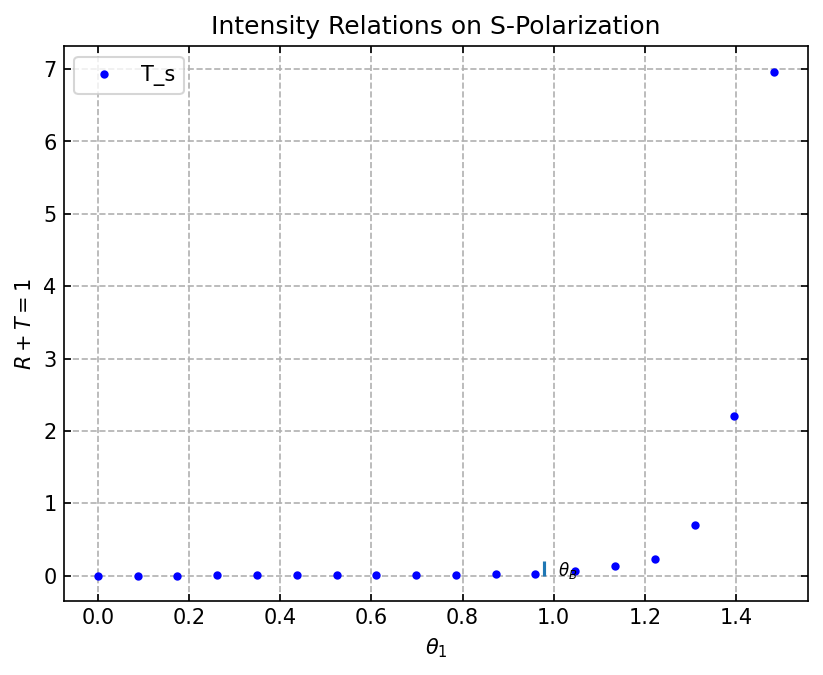

In [170]:
fig, ax = plt.subplots()

ax.plot(theta1_s, T_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
#ax.plot(theta1_s, R_s, '.', color= 'red',label = 'R_s')  # Plotting Reflected Light
# ax.plot(theta1_s, total_s, '.', markersize = 4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.20)
# ax.vlines(x = Critical, ymin=0, ymax=20)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

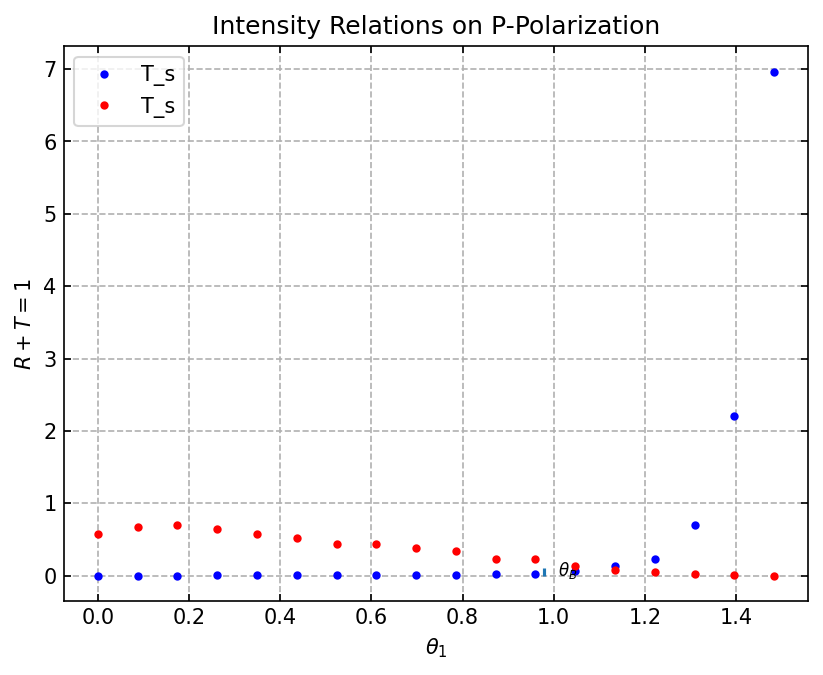

In [171]:
fig, ax = plt.subplots()

ax.plot(theta1_s, T_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, R_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
#ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on P-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

INTENSITY PLOTS AIR TO GLASS

In [172]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

C:\Users\hanse\AppData\Local\Temp\ipykernel_11664\3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
C:\Users\hanse\AppData\Local\Temp\ipykernel_11664\3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


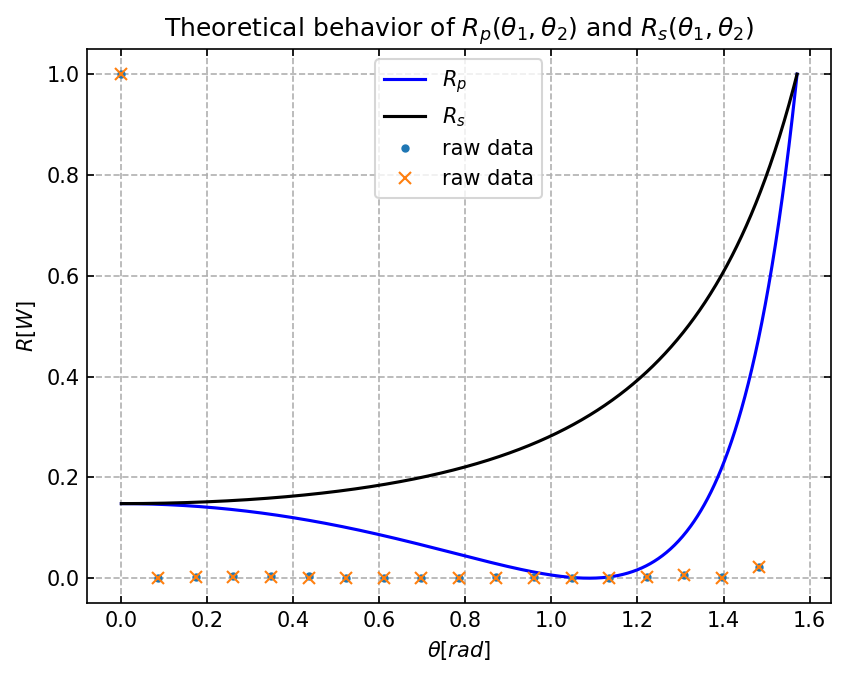

In [175]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')
plt.plot(theta1_p, reflected_p(theta1_p, theta2_reflect_p), 'x', label = 'raw data')


# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

C:\Users\hanse\AppData\Local\Temp\ipykernel_11664\3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
C:\Users\hanse\AppData\Local\Temp\ipykernel_11664\3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


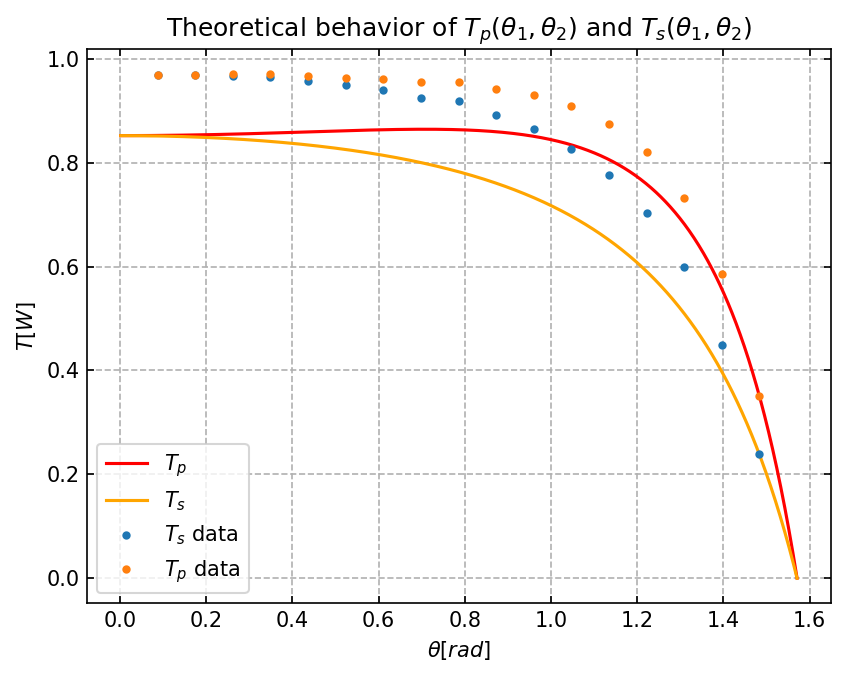

In [174]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')
plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

INTENSITY FOR GLASS TO AIR